In [52]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from IPython.display import Video
%matplotlib inline

In [2]:
files = sorted(glob.glob('images/*.jpeg'))

In [3]:
ims = [cv2.imread(f) for f in files]

In [4]:
H, W, _ = ims[0].shape

In [5]:
len(ims)

13

In [6]:
ims[0].shape

(3024, 4032, 3)

In [7]:
w, h = (np.r_[W, H] / 16.).astype(int)

In [18]:
cv2.Canny?

In [31]:
line

array([[  8, 159, 233, 159]], dtype=int32)

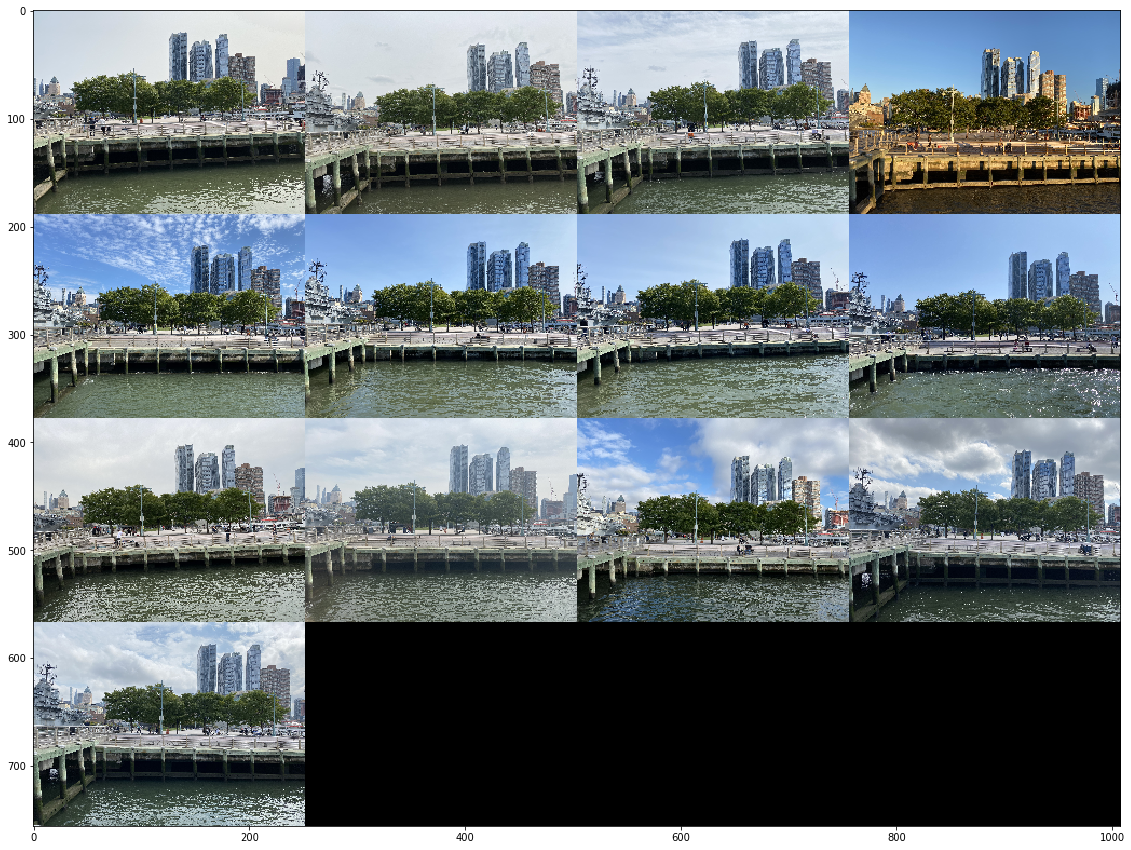

In [34]:
n, m = 4, 4

Z = np.zeros((h * n, w * m, 3)).astype('uint8')

k = 0
for i in range(n):
    for j in range(m):
        try:
            z = cv2.resize(ims[k][:, :, ::-1], (w, h))
        except:
            break
        
        #z = cv2.Canny(z, 200, 500)
        
        Z[i*h:(i+1)*h, j*w:(j+1)*w] = z
        k += 1
        plt.show()

fig, ax = plt.subplots(figsize=(20, 15))
ax.imshow(Z, cmap='binary')
plt.show()

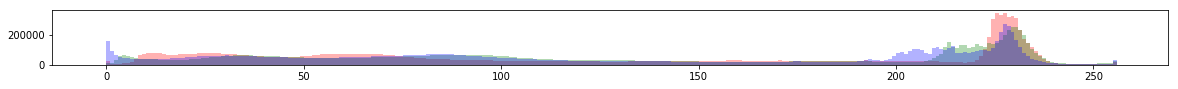

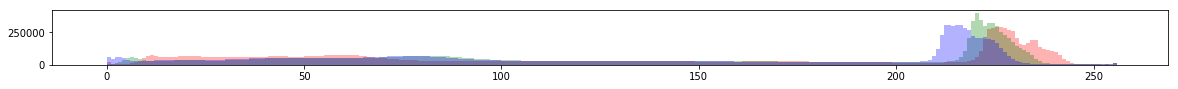

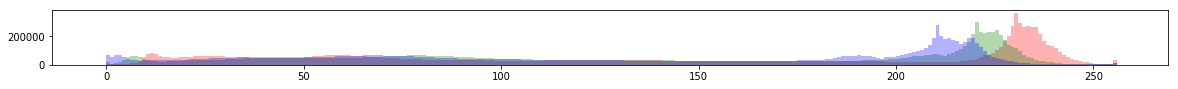

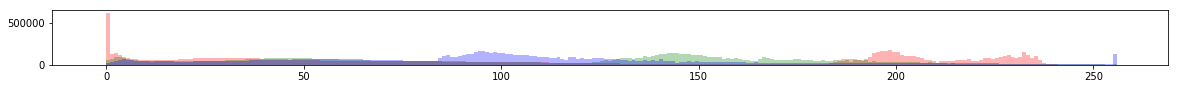

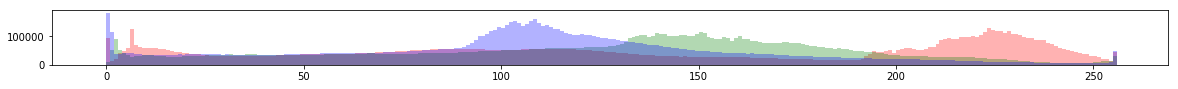

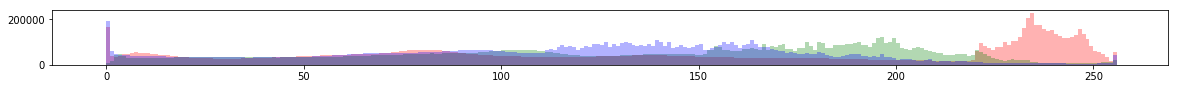

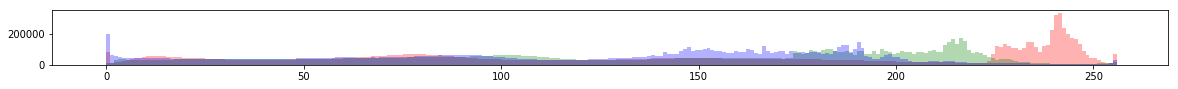

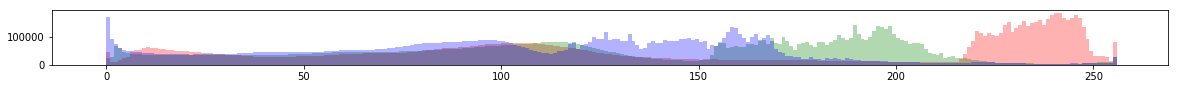

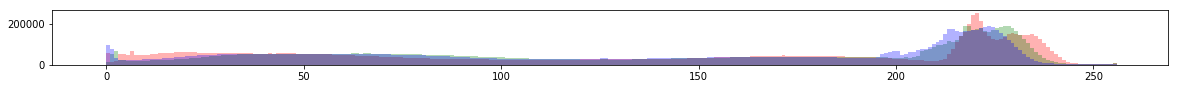

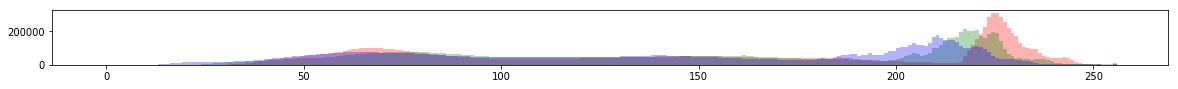

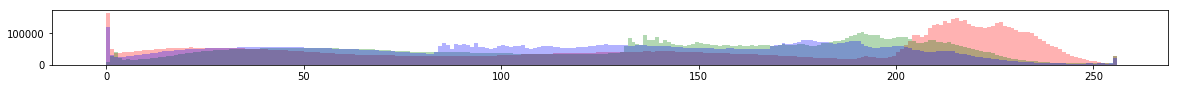

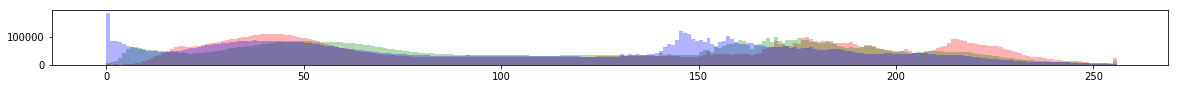

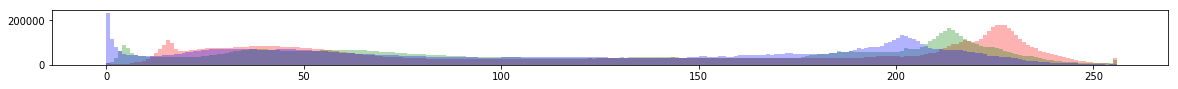

In [9]:
bins = np.arange(-1, 257)

for im in ims:
    fig, ax = plt.subplots(figsize=(20, 1))
    ax.hist(im[:, :, 0].flatten(), bins, color='r', alpha=0.3)
    ax.hist(im[:, :, 1].flatten(), bins, color='g', alpha=0.3)
    ax.hist(im[:, :, 2].flatten(), bins, color='b', alpha=0.3)
    plt.show()

0
1
[15.52845767 95.94573754 29.20556835 29.20556835 30.20556835 29.20556835]
2
[24.08133214 95.94573754 29.20556835 29.20556835 30.20556835 29.20556835]
3
[ 134.30240732 4724.22324381   29.20556835   29.20556835   30.20556835
   29.20556835]
4
[19.75808605 95.94573754 29.20556835 29.20556835 30.20556835 29.20556835]
5
[ 9.74964326 95.94573754 29.20556835 29.20556835 30.20556835 29.20556835]
6
[20.22990233 95.94573754 29.20556835 29.20556835 30.20556835 29.20556835]
7
[ 18.21872486 140.1312685   29.20556835  29.20556835  30.20556835
  29.20556835]
8
[55.39310364 98.5336665  29.20556835 29.20556835 30.20556835 29.20556835]
9
[58.91873796 95.94573754 29.20556835 29.20556835 30.20556835 29.20556835]
10
[ 23.31151083 466.42662209  29.20556835  29.20556835  30.20556835
  29.20556835]
11
[ 7.28151675 95.94573754 29.20556835 29.20556835 30.20556835 29.20556835]
12
[ 15.62828596 165.63162382  29.20556835  29.20556835  30.20556835
  29.20556835]


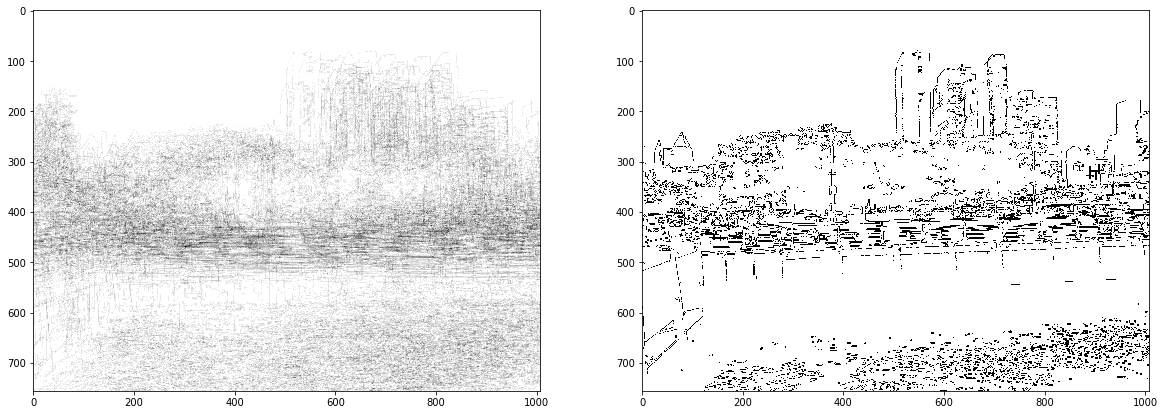

In [91]:
def err(m, z0, z1, pad=500):
    m = m.reshape((2, 3))
    zW = cv2.warpAffine(z1, m, (w,h))
    dzW = zW[pad:-pad, pad:-pad].astype('float') - z0[pad:-pad, pad:-pad].astype('float')
    return (dzW**2).sum()

# initial guess for affine transform
m0 = np.r_[1, 0, 0, 0, 1, 0].astype('float32')

w, h = (np.r_[W, H] / 4.).astype(int)

Z = np.zeros((h, w))
Zt = np.zeros((h, w))

for k in range(len(ims)):
    print(k)
    try:
        #z = ims[k][:, :, ::-1]
        z = cv2.resize(ims[k][:, :, ::-1], (w, h))
    except:
        break

    z = cv2.Canny(z, 200, 500) / 10
    Z += z
    
    # function call for lambda function
    if k > 0:
        f = lambda m: err(m, z0=z0, z1=z, pad=100)

        # perform minimization
        r = minimize(f, m0, method='Powell')
        print(r.x)
        
        # apply affine transform
        zt = cv2.warpAffine(z, r.x.reshape((2, 3)), (w, h))
    else:
        zt = np.copy(z)
        z0 = np.copy(z)
        
    Zt += zt

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(Z, cmap='binary')
ax[1].imshow(Zt, cmap='binary')
plt.show()

In [92]:
Zt

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
Z.min(), Z.max(), Zt.min(), Zt.max()

(0.0, 280.5, 0.0, 25.5)

In [94]:
np.unique(Zt.flatten(), return_counts=True)

(array([ 0. , 25.5]), array([701592,  60456]))

In [87]:
np.unique(Z.flatten(), return_counts=True)

(array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. , 280.5]),
 array([371607, 183445, 111150,  56672,  25099,   9733,   3229,    892,
           193,     24,      3,      1]))